### Lab 8 
#### Traffic Simulation Assignment

##### Traffic Jams on a Circular Road

Nagel & Schreckenberg (1992) presented a model for traffic simulation using simple arrays to represent
lanes. In our implementation, an array value represents a tile of space in the road which a car could
occupy, represented by an integer representing its speed: 0 for stationary cars, 1 for cars that can move 1
tile per timestep and so on. -1 is used to signify and empty tile. The boundaries are periodic, representing
a looped road. Each instance of the model is instantiated with the following parameters:

 1. l_road: the length of the road, in tiles.
 2. density: the probability of any given tile to instantiate with a car occupying it. This stochastic
    initialization means that density values are only approximated during analysis.
 3. v_max: the speed limit for any given car.
 4. p_slow: the probability for any car to slow down randomly before moving.
 
The model’s time evolution is carried out synchronously and stepwise, for a specified amount of
simulation steps:

 1. Acceleration: All cars speed up by 1, unless the speed limit has been reached.
 2. Deceleration: All cars slow down to avoid collisions, exactly down to the amount of free space
    before the next car in the lane.
 3. Randomized Deceleration: Each car slows down by 1 based on chance.
 4. Movement: All cars move forward tiles equal to their speeds.
 
This model can be described as a class of stochastic cellular automata with v_max+2 states, a window of
v_max+1 in front of each tile, and periodic boundaries. However, a pattern dictionary (rule-space) for this
automaton would be very large, and so implementation was performed with array operations (python
loops were considered but proved around 10 times more computationally expensive).
1
Running the simulation for a certain set of parameters, we can examine the evolution of the state of the
road with time by printing the state before each movement step:

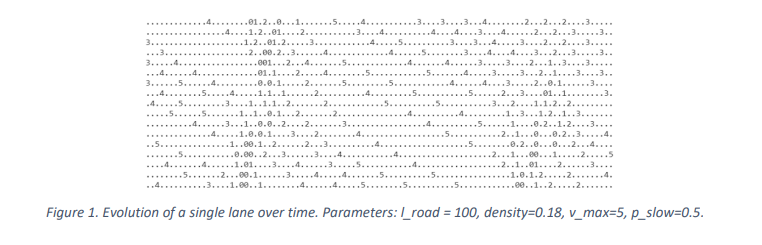

**Question 1**. Comment every and each line of code in details, what it does.

In [2]:
import numpy as np
import random 

class TrafficSimulation:
    
    def __init__(self, road_length = 100, density = 0.18, max_velocity = 5, slow_prob = 0.3):
        self.road_length = road_length
        self.density = density
        self.max_velocity = max_velocity
        self.slow_prob = slow_prob
        self.flow_count = 0 
        
        self.state = -np.ones(100, dtype=int)
        for i in range(100):
            if random.random() <= self.density:
                self.state[i] = random.randint(0,5)
        
        
    def update(self):
        m = self.max_velocity
        next_state = -np.ones(100, dtype=int)
        
        
        current_index = np.argwhere(self.state!=-1)
        num_cars = len(current_index)
    
        for i in range(num_cars):
            c = current_index[i]
            n = current_index[(i+1) % len(current_index)]
            v = self.state[c]
            
            dist = (n-c)%100 
             
            if v < m and dist >= v+1:
                v = v + 1
                
            if v > 0 and dist <= v :
                v = dist - 1
                           
            if v > 0 and random.random() <= self.slow_prob:
                v = v - 1
            
            next_state[(c + v) % 100] = v
            
            if c+v >= 100:
                self.flow_count += 1
            
        self.state = next_state

        
    def display(self):
        print(''.join('.' if x == -1 else str(x) for x in self.state))

**Question 2**. Uing density 0.2, 0.3 and 0.4, and default values for other variables, initialize **trafficSimulationObject1**, **trafficSimulationObject2** and **trafficSimulationObject3** from **TrafficSimulation** class, and after for each object call **update()** and **display()** method 30 times, and see what happens. Best solution, would be to define a function, and then call the function 3 times.

In [13]:
random.seed(100)

...
...
...

.1...3.0.1...2.0.1..2..100.1..1......5.00.1..1......50..1..1...0.00..0.1.....5..10.000...3....4..00.
...2..1.1..2.0..1..2.1.00.1..2..2.....100...2..2....0.1...2.1...10.1..1..2.....20.1000......3...200.
.....2.1..2.10....2.1.10.1..2.1....3..00.1....2..2...1..2.0...2.0.1..2..2...3..0.1000.1........300.1
.2....1..2.100.....1.100...20..1....1.0.1..2....2...3..2.1.1...1.1.1...2...3..20.0000...2......00.1.
2...3..1..100.1.....1000...0.1...2...1.1..2..2.....3..20.0...2.0..1..2...2..1.0.1000.1....2....0.1..
...3..2..200.1..2...0000...0...2...2..1.1..1....3....20.1.1...1.1..1....3.1..1.10000...2.....3.0...2
.2..1...200.1..2..2.000.1..0.....2..1..1..2..2......40.1.1..2.0..1..1....1..2.10000.1.....3...10....
..1...2.000...2..2.100.1.1.0.......2..2..2.1...2....0.10...20..1..1..1....1..10000.1..2......300....
....2..100.1....2.100.1.1.1.1........2.1..1..2....3.0.00...0.1..1...2.1.....20000.1..2...3...000....
......200.1.1....100.10.0..1..2.......1..2..2...3..10.00....1.1..1...1..2...0000.1..2...3..

**Question 3** Continue to comment .... 

In [3]:

random.seed(100)


flow_rate = []
densities = []
time_step = 200

for i in range(1,20):
    p = 0.05*i
    densities.append(p) 
    T = TrafficSimulation(density = p) 
    p_all_flow_rates = [] 
    
    for j in range(50): 
        for i in range(time_step): 
            T.update()
        p_all_flow_rates.append(T.flow_count/time_step)
    
    p_flow_rate = sum(p_all_flow_rates)/50.0
    flow_rate.append(p_flow_rate)

We observe traffic jams, resulting from randomized deceleration of certain cars forcing others to stop.
Since cars do not slow down to keep distance in the model, and do not consider their neighbors’ speeds to
accelerate in unison, driver response delay is simulated, generating jams that advance backwards through
the road as long as cars keep flowing in.
We keep track of flow by averaging the number of cars passing through a certain tile over the simulation
time, and run 100 simulations at 35 different density settings. By plotting we observe the effect of density
on flow:
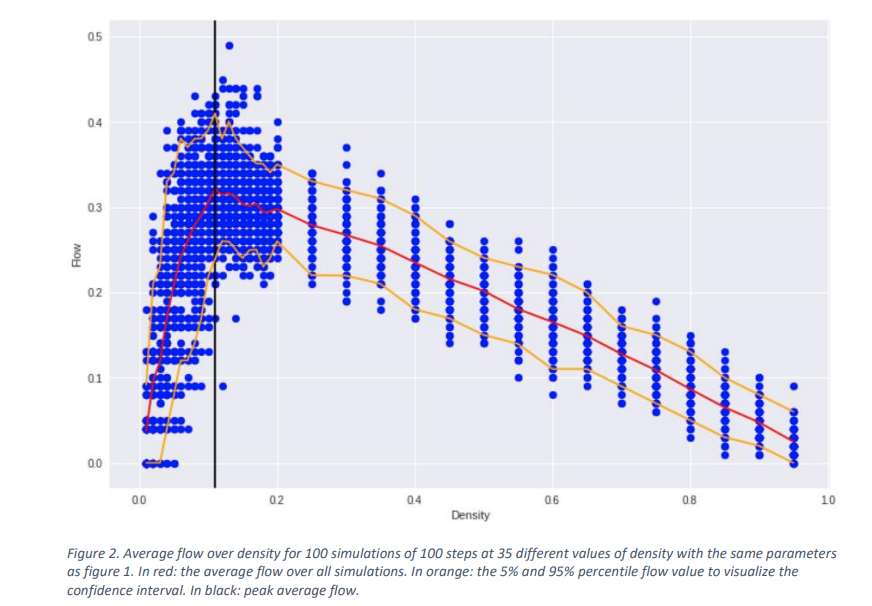
We observe a clear peak average flow around density 0.11. Beforehand, less cars make use of the space,
and afterwards jams slow the traffic along the road. According to Nagel & Schreckenberg (1992), this
behavior approximates real-life distributions. We observe a peak flow of 0.321 with a standard deviation
of 0.053 at the peak.

**Question 4**. Using **plt** object, plot the values **x = densities** and **y = flow_rate**. Put `Density` and `Flow rate` as label, and the title `Traffic Simulation`.

Text(0, 0.5, 'Flow rate')

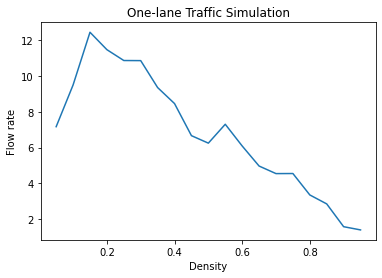

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

...
...
...